# Trends, seasonality and stationarity
----------------------------------------------

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import statsmodels as sm
import scipy.stats as stats
from scipy.ndimage.interpolation import shift
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm


In [12]:
from statsmodels.graphics.api import qqplot

In [13]:
Data = pd.read_csv('data-1.csv',
                             index_col=['date'],
                             decimal =',',
                             dayfirst = True,
                             parse_dates=True)

Data.columns = ['indx', 'dane']
Data.describe()

,indx,dane
count,70.000000,70.000000
mean,0.909854,0.507857
std,1.884844,0.670515
min,-2.915657,-1.000000
25%,-0.413110,0.050000
50%,0.727916,0.410000
75%,1.820389,0.940000
max,7.506650,2.820000


In [14]:
Data.head(4)

,indx,dane
date,,
2010-10-01,0.211742,-0.44
2010-11-01,0.987522,1.65
2010-12-01,5.314398,1.65
2011-01-01,2.813850,1.61


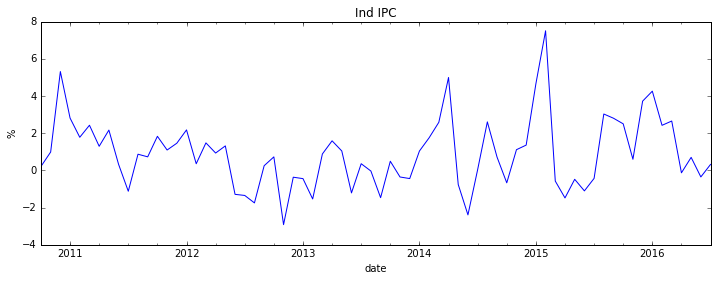

In [15]:
Data.indx.plot(figsize=(12,4))
plt.title('Ind IPC')
plt.ylabel('%')

# Trends and seasonality

http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

http://www.cbcity.de/timeseries-decomposition-in-python-with-statsmodels-and-pandas

Troubles if freq $\ne$ 12 in the code below!

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


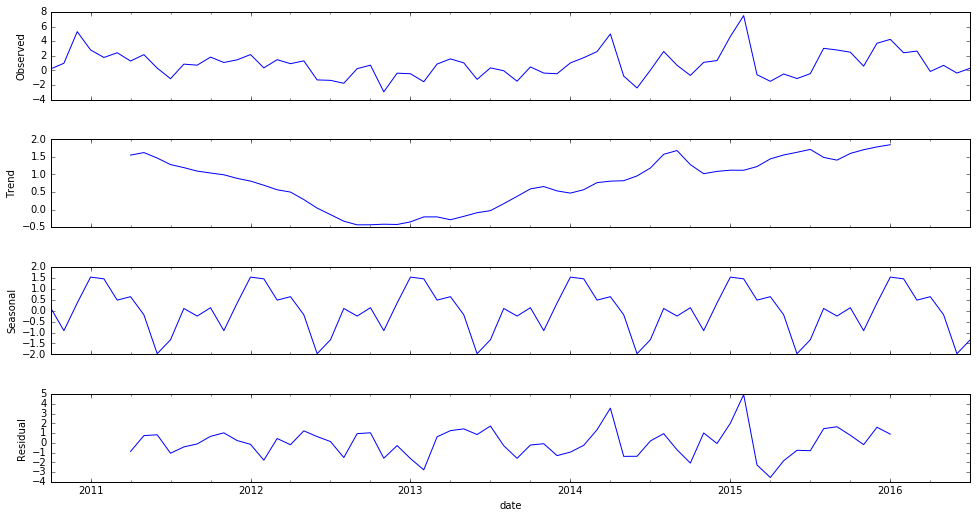

In [22]:
decompfreq = 12
decomposition = sm.tsa.seasonal_decompose(Data.indx.interpolate(), model='additive')
fig = plt.figure()  
fig = decomposition.plot()  
#plt.ylabel('%')
fig.set_size_inches(15, 8)

## Stationarity

http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html

In [47]:
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(decomposition.resid.values[~np.isnan(decomposition.resid.values)], autolag='AIC')
dftest

Results of Dickey-Fuller Test:


(-5.1871391094831756,
 9.3394858492493054e-06,
 8,
 49,
 {'1%': -3.5714715250448363,
  '10%': -2.5993358475635153,
  '5%': -2.9226294805735709},
 163.97337178304906)

In [46]:
decomposition.resid.values
sm.stats.durbin_watson(decomposition.resid.values[~np.isnan(decomposition.resid.values)])
sm.stats.diagnostic.acorr_ljungbox(decomposition.resid.values[~np.isnan(decomposition.resid.values)], 15)

(array([  2.96415078,   6.65375265,   8.56008403,  12.29861722,
         14.91800036,  14.9201738 ,  14.9835751 ,  16.26832954,
         16.55366998,  25.65214132,  26.70620841,  26.71572361,
         26.98502376,  32.06856948,  34.46070291]),
 array([ 0.08512915,  0.03590509,  0.03574937,  0.01526347,  0.01071852,
         0.02088675,  0.03621053,  0.03869661,  0.05618183,  0.00423731,
         0.00508849,  0.00848885,  0.01249998,  0.0039171 ,  0.00293269]))

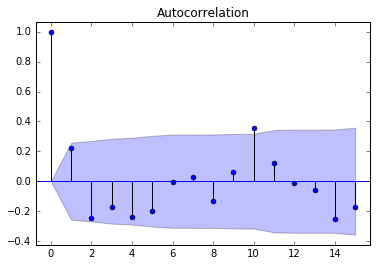

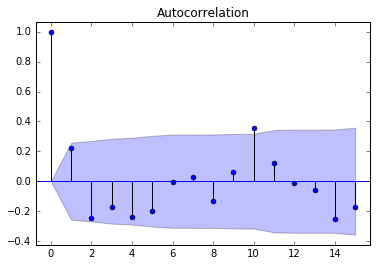

In [43]:
decomposition.resid.values
tsaplots.plot_acf(decomposition.resid.values[~np.isnan(decomposition.resid.values)], lags=15)

No kpss in statsmdels. However check: 

http://denizstij.blogspot.com.co/2015/01/stationarity-test-with-kpss.html